# EmojiGen

#### Data Ingestion

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading emoji data from OpenMoji
# unicode-based emoji
# https://github.com/hfg-gmuend/openmoji/blob/master/data/openmoji.csv
open_moji_df = pd.read_csv('../data/openmoji.csv')

open_moji_df

,emoji,hexcode,group,subgroups,annotation,tags,openmoji_tags,openmoji_author,openmoji_date,skintone,skintone_combination,skintone_base_emoji,skintone_base_hexcode,unicode,order
0,😀,1F600,smileys-emotion,face-smiling,grinning face,"face, grin",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,1,1.0
1,😃,1F603,smileys-emotion,face-smiling,grinning face with big eyes,"face, mouth, open, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,2.0
2,😄,1F604,smileys-emotion,face-smiling,grinning face with smiling eyes,"eye, face, mouth, open, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,3.0
3,😁,1F601,smileys-emotion,face-smiling,beaming face with smiling eyes,"eye, face, grin, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,4.0
4,😆,1F606,smileys-emotion,face-smiling,grinning squinting face,"face, laugh, mouth, satisfied, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,⮼,2BBC,extras-unicode,symbol-other,overlapping black squares,NaN,NaN,loominade,2020-04-22,NaN,NaN,NaN,NaN,1.1,NaN
4280,⯃,2BC3,extras-unicode,symbol-other,horizontal black octagon,NaN,equilateral polygon,loominade,2020-04-17,NaN,NaN,NaN,NaN,5,NaN
4281,⯄,2BC4,extras-unicode,symbol-other,black octagon,NaN,equilateral polygon,loominade,2020-04-17,NaN,NaN,NaN,NaN,5,NaN
4282,⯪,2BEA,extras-unicode,symbol-other,star with left half black,NaN,half star,Alexander Müller,2020-11-09,NaN,NaN,NaN,NaN,11,NaN


In [3]:
# Loading emoji data from Emojipedia
# unicode-based emoji

emojipedia_df = pd.read_csv('../data/emojipedia/emojis_details.csv')

emojipedia_df

,Group,Subgroup,Emoji,Title,DescribedBy,URL,Description,Codepoints Hex
0,smiley,Smiling & Affectionate,😀,Grinning Face,grinning-face,/grinning-face,"A yellow face with simple, open eyes and a bro...",U+1F600
1,smiley,Smiling & Affectionate,😃,Grinning Face with Big Eyes,grinning-face-with-big-eyes,/grinning-face-with-big-eyes,"A yellow face with smiling eyes and a broad, o...",U+1F603
2,smiley,Smiling & Affectionate,😄,Grinning Face with Smiling Eyes,grinning-face-with-smiling-eyes,/grinning-face-with-smiling-eyes,"A yellow face with smiling eyes and a broad, o...",U+1F604
3,smiley,Smiling & Affectionate,😁,Beaming Face with Smiling Eyes,beaming-face-with-smiling-eyes,/beaming-face-with-smiling-eyes,A yellow face with smiling eyes and full-tooth...,U+1F601
4,smiley,Smiling & Affectionate,😆,Grinning Squinting Face,grinning-squinting-face,/grinning-squinting-face,"A yellow face with a broad, open smile and scr...",U+1F606
...,...,...,...,...,...,...,...,...
1888,flags,"Oceania, Island Nations & Territories",🇫🇲,Flag: Micronesia,flag-micronesia,/flag-micronesia,"The flag for Micronesia , which may show as th...","U+1F1EB,U+1F1F2"
1889,objects,Clothing & Appearance,👒,Woman’s Hat,womans-hat,/womans-hat,"A hat worn by women for sun protection, or for...",U+1F452
1890,objects,Office & Stationery,📕,Closed Book,closed-book,/closed-book,"A closed, hardcover book depicted with a red c...",U+1F4D5
1891,objects,Tools & Household Items,📡,Satellite Antenna,satellite-antenna,/satellite-antenna,"A dish antenna, as used to send or receive inf...",U+1F4E1


In [4]:
# Merge the llm_emoji_df, openmoji_df, emojipedia_df based on unicode/hexcode
# The final df should have unicode, title (short descriotion, annotation), tags, group, subgroup, description)

In [5]:
#Loading stickers dataset Skiittoo/cartoon-faces
%pip install datasets
from datasets import load_dataset
import  pandas as pd

stickers_ds = load_dataset("Skiittoo/cartoon-faces")
print(stickers_ds)

#Convert it into pandas dataframe
stickers_df = pd.DataFrame(stickers_ds['train'])

stickers_df


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 10000
    })
})


,image,text
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, w..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, o..."
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, without facial hair..."
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, without facial hair..."
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, w..."
...,...,...
9995,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face without glasses, with facial hair..."
9996,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, b..."
9997,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face without glasses, with facial hair..."
9998,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, d..."


Insights on Stickers Dataset

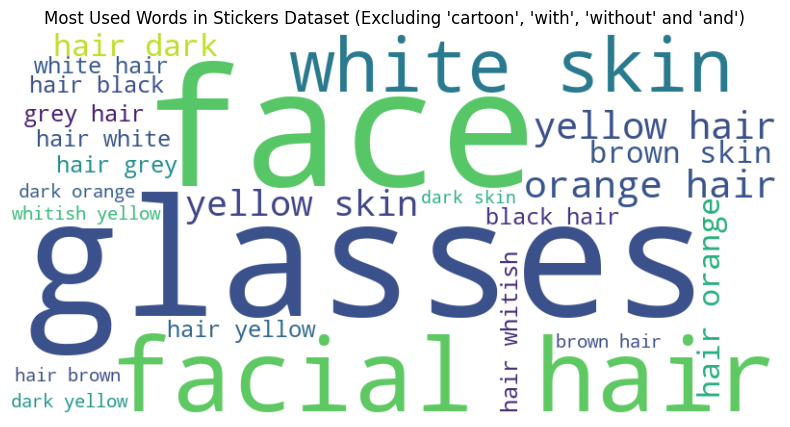

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data from the stickers dataset
text_data = " ".join(stickers_df['text'])

# Exclude 'cartoon' and 'with' from the word cloud
wordcloud = WordCloud(width=800, height=400, stopwords={'cartoon','with','without','and'}, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Used Words in Stickers Dataset (Excluding 'cartoon', 'with', 'without' and 'and')")
plt.show()

In [7]:
stickers_insights = stickers_df['text'].str.extractall(r'(?P<Attribute>with glasses|without glasses|with facial hair|without facial hair)').groupby('Attribute').size()
objects_subgroup_insights = stickers_insights.reindex(['with glasses', 'without glasses', 'with facial hair', 'without facial hair']).fillna(0).astype(int)
objects_subgroup_insights

Attribute
with glasses           5014
without glasses        4986
with facial hair       4956
without facial hair    5044
dtype: int64

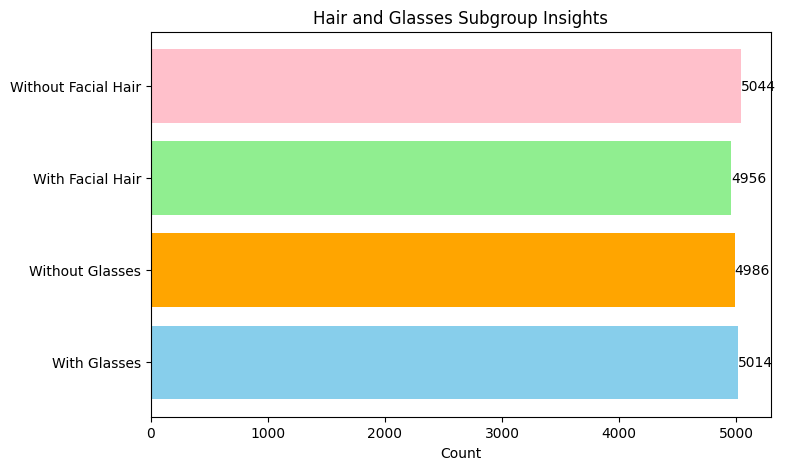

In [8]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['With Glasses', 'Without Glasses', 'With Facial Hair', 'Without Facial Hair']
values = [objects_subgroup_insights['with glasses'], objects_subgroup_insights['without glasses'],
          objects_subgroup_insights['with facial hair'], objects_subgroup_insights['without facial hair']]

# Define a unique color for each bar
colors = ['skyblue', 'orange', 'lightgreen', 'pink']

# Plot horizontal bar graph
plt.figure(figsize=(8, 5))
bars = plt.barh(labels, values, color=colors)
plt.title("Hair and Glasses Subgroup Insights")
plt.xlabel("Count")
# Add text to each bar
for bar, value in zip(bars, values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, str(value), va='center', ha='left')

# Show the plot
plt.show()

In [10]:
import re

# Define the patterns for hair color and skin color
hair_color_pattern = r'\b(?:black|blonde|brown|red|gray|white|orange|yellow|dark-orange|dark-yellow|whitish-yellow|grey)\b'
skin_color_pattern = r'\b(?:fair|dark|tan|light|white|yellow|brown)\b'

# Function to extract hair and skin color
def extract_colors(text):
    hair_color_match = re.search(hair_color_pattern, text)
    skin_color_match = re.search(skin_color_pattern, text)
    hair_color = hair_color_match.group(0) if hair_color_match else None
    skin_color = skin_color_match.group(0) if skin_color_match else None
    return hair_color, skin_color

# Apply the function to the text column
stickers_df[['hair_color', 'skin_color']] = stickers_df['text'].apply(lambda x: pd.Series(extract_colors(x)))

# Display the DataFrame with the new columns
print(stickers_df[['text', 'hair_color', 'skin_color']])

                                                   text      hair_color  \
0     Cartoon face with glasses, with facial hair, w...           white   
1     Cartoon face with glasses, with facial hair, o...          orange   
2     Cartoon face with glasses, without facial hair...           brown   
3     Cartoon face with glasses, without facial hair...           black   
4     Cartoon face with glasses, with facial hair, w...  whitish-yellow   
...                                                 ...             ...   
9995  Cartoon face without glasses, with facial hair...     dark-yellow   
9996  Cartoon face with glasses, with facial hair, b...           black   
9997  Cartoon face without glasses, with facial hair...           brown   
9998  Cartoon face with glasses, with facial hair, d...     dark-orange   
9999  Cartoon face without glasses, with facial hair...          orange   

     skin_color  
0         white  
1        yellow  
2         brown  
3        yellow  
4        

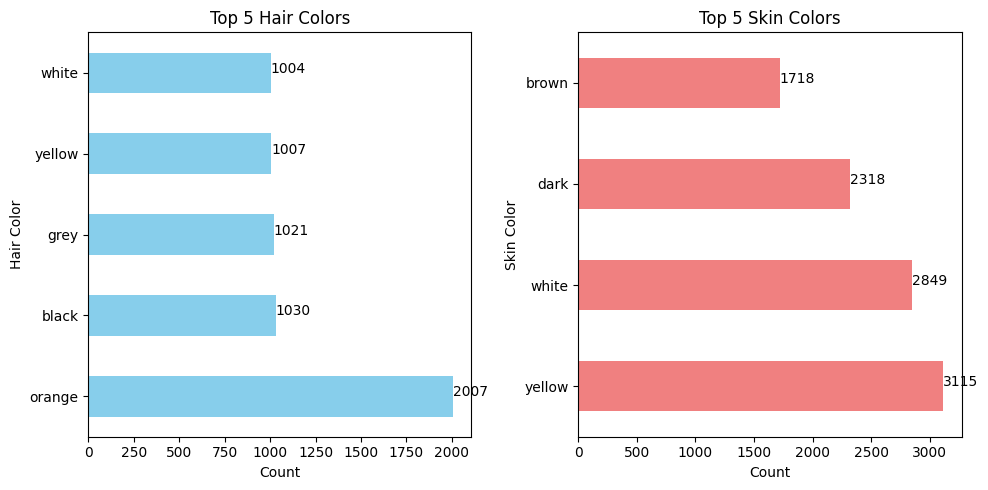

In [13]:
# Get the top 3 most common hair colors
top_hair_colors = stickers_df['hair_color'].value_counts().nlargest(5)

# Get the top 3 most common skin colors
top_skin_colors = stickers_df['skin_color'].value_counts().nlargest(5)

# Plot the top 3 hair colors
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
top_hair_colors.plot(kind='barh', color='skyblue')
plt.title('Top 5 Hair Colors')
plt.xlabel('Count')
plt.ylabel('Hair Color')

# Add count labels to the bars
for index, value in enumerate(top_hair_colors):
    plt.text(value, index, str(value))


# Plot the top 3 skin colors
plt.subplot(1, 2, 2)
top_skin_colors.plot(kind='barh', color='lightcoral')
plt.title('Top 5 Skin Colors')
plt.xlabel('Count')
plt.ylabel('Skin Color')

# Add count labels to the bars
for index, value in enumerate(top_skin_colors):
    plt.text(value, index, str(value))


plt.tight_layout()
plt.show()

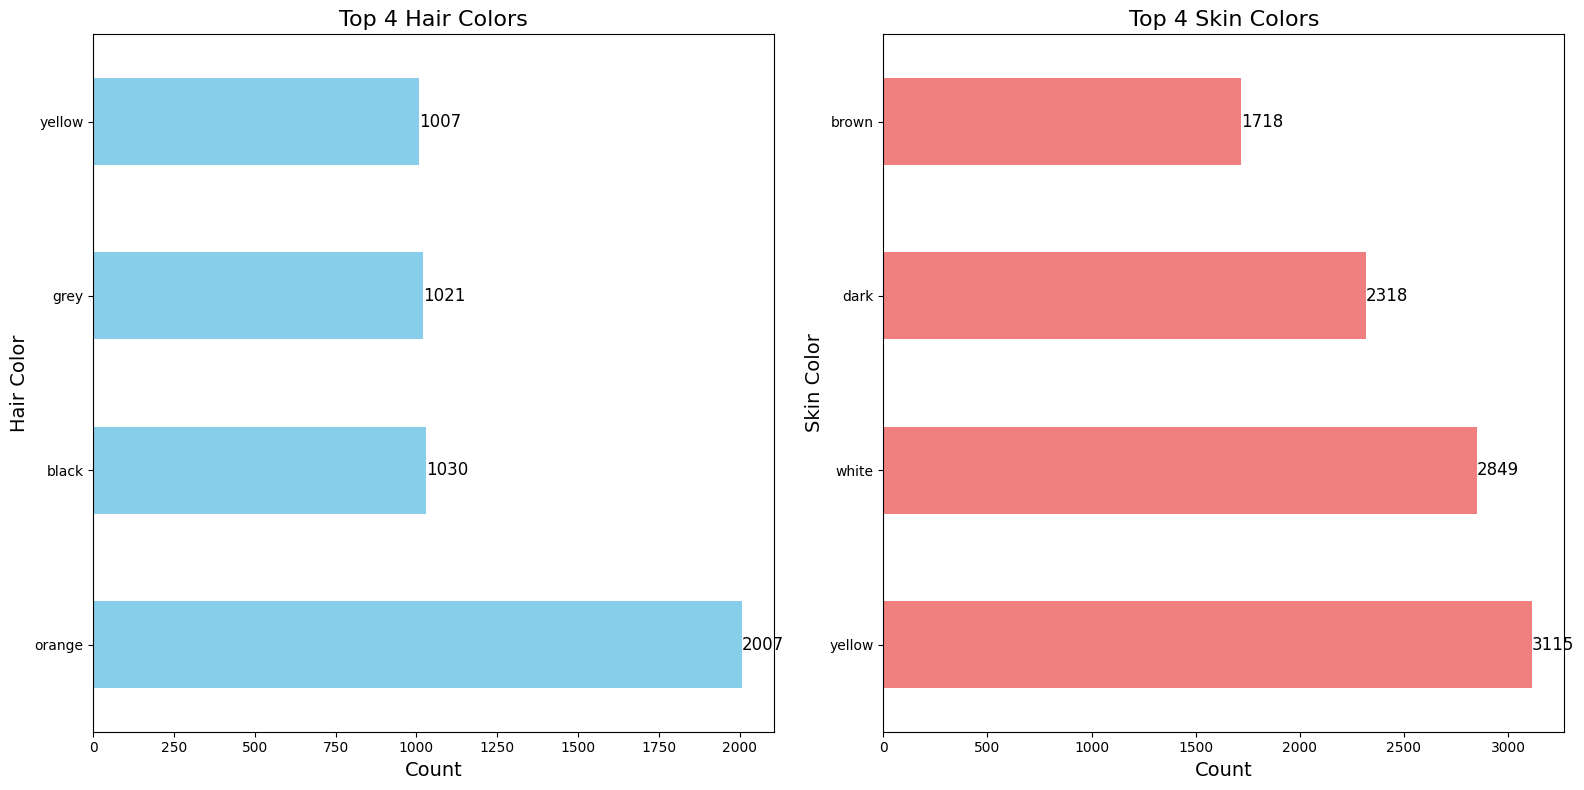

In [20]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Assuming stickers_df is already loaded with a 'text' column
# Example: stickers_df = pd.read_csv('path_to_file.csv')

# Define the patterns for hair color and skin color
hair_color_pattern = r'\b(?:black|blonde|brown|red|gray|white|orange|yellow|dark-orange|dark-yellow|whitish-yellow|grey)\b'
skin_color_pattern = r'\b(?:fair|dark|tan|light|white|yellow|brown)\b'

# Function to extract hair and skin color
def extract_colors(text):
    hair_color_match = re.search(hair_color_pattern, text)
    skin_color_match = re.search(skin_color_pattern, text)
    hair_color = hair_color_match.group(0) if hair_color_match else None
    skin_color = skin_color_match.group(0) if skin_color_match else None
    return hair_color, skin_color

# Apply the function to the text column
stickers_df[['hair_color', 'skin_color']] = stickers_df['text'].apply(lambda x: pd.Series(extract_colors(x)))

# Filter out None values
stickers_df = stickers_df.dropna(subset=['hair_color', 'skin_color'])

# Get the top 4 most common hair colors
top_hair_colors = stickers_df['hair_color'].value_counts().nlargest(4)

# Get the top 4 most common skin colors
top_skin_colors = stickers_df['skin_color'].value_counts().nlargest(4)

# Plot the top 5 hair colors
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
hair_bars = top_hair_colors.plot(kind='barh', color='skyblue')
plt.title('Top 4 Hair Colors', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Hair Color', fontsize=14)

# Add count labels to the bars
for index, value in enumerate(top_hair_colors):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=12)

# Plot the top 5 skin colors
plt.subplot(1, 2, 2)
skin_bars = top_skin_colors.plot(kind='barh', color='lightcoral')
plt.title('Top 4 Skin Colors', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Skin Color', fontsize=14)

# Add count labels to the bars
for index, value in enumerate(top_skin_colors):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()